# **Problem Statement**


A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

# **Business Goal**

It is required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# **Reading the data and inspecting the data quality**

In [2]:
df = pd.read_csv('../input/bikesharing/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Checking the dataframe's Shape
df.shape

(730, 16)

In [4]:

# Checking if instant column has unique entries
df['instant'].nunique()

730

In [5]:
# Setting the instant column as index to number of columns as it has unique entries
df.set_index('instant', inplace=True)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**Casual and registered columns are dropped as the Model is to be built for cnt column, casual and registered are redundant here.**

In [6]:
df.drop(['casual', 'registered'], inplace=True, axis = 1)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
# Checking Column Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 79.8+ KB


In [8]:

# Converting the dtedat to Date Time
df['dteday'] = pd.to_datetime(df['dteday'])
df['dteday'].dtypes

dtype('<M8[ns]')

In [9]:
# Changing the month number to month abbr for better view
import calendar
df['mnth'] = df['mnth'].apply(lambda x: calendar.month_abbr[x])
df['mnth'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [10]:
# Since season, weekday and weathesit are basically categorical values, converting them to string type
df[['season','weekday','weathersit']] = df[['season','weekday','weathersit']].astype(str)

In [11]:
# Checking the summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(4)
memory usage: 79.8+ KB


In [12]:
# Checking the % of null values in each column
round(df.isnull().sum()/len(df.index)*100,2)

dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64

**No null values observed**

In [13]:

# Checking the range of values, for example temperature, humidity etc
df[['temp', 'atemp', 'hum', 'windspeed']].describe()

,temp,atemp,hum,windspeed
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620
std,7.506729,8.150308,14.237589,5.195841
min,2.424346,3.953480,0.000000,1.500244
25%,13.811885,16.889713,52.000000,9.041650
50%,20.465826,24.368225,62.625000,12.125325
75%,26.880615,30.445775,72.989575,15.625589
max,35.328347,42.044800,97.250000,34.000021


In [14]:
# Converting the weather variable into more understanable text
df['weathersit'].replace(['1','2','3','4'],['Good', 'Average', 'Bad', 'Very Bad'], inplace=True)

In [15]:
# Converting the seasons into specific season names for better understanding
df['season'].replace(['1','2','3','4'],['spring', 'summer', 'fall', 'winter'], inplace=True)

# **Data Visualization**

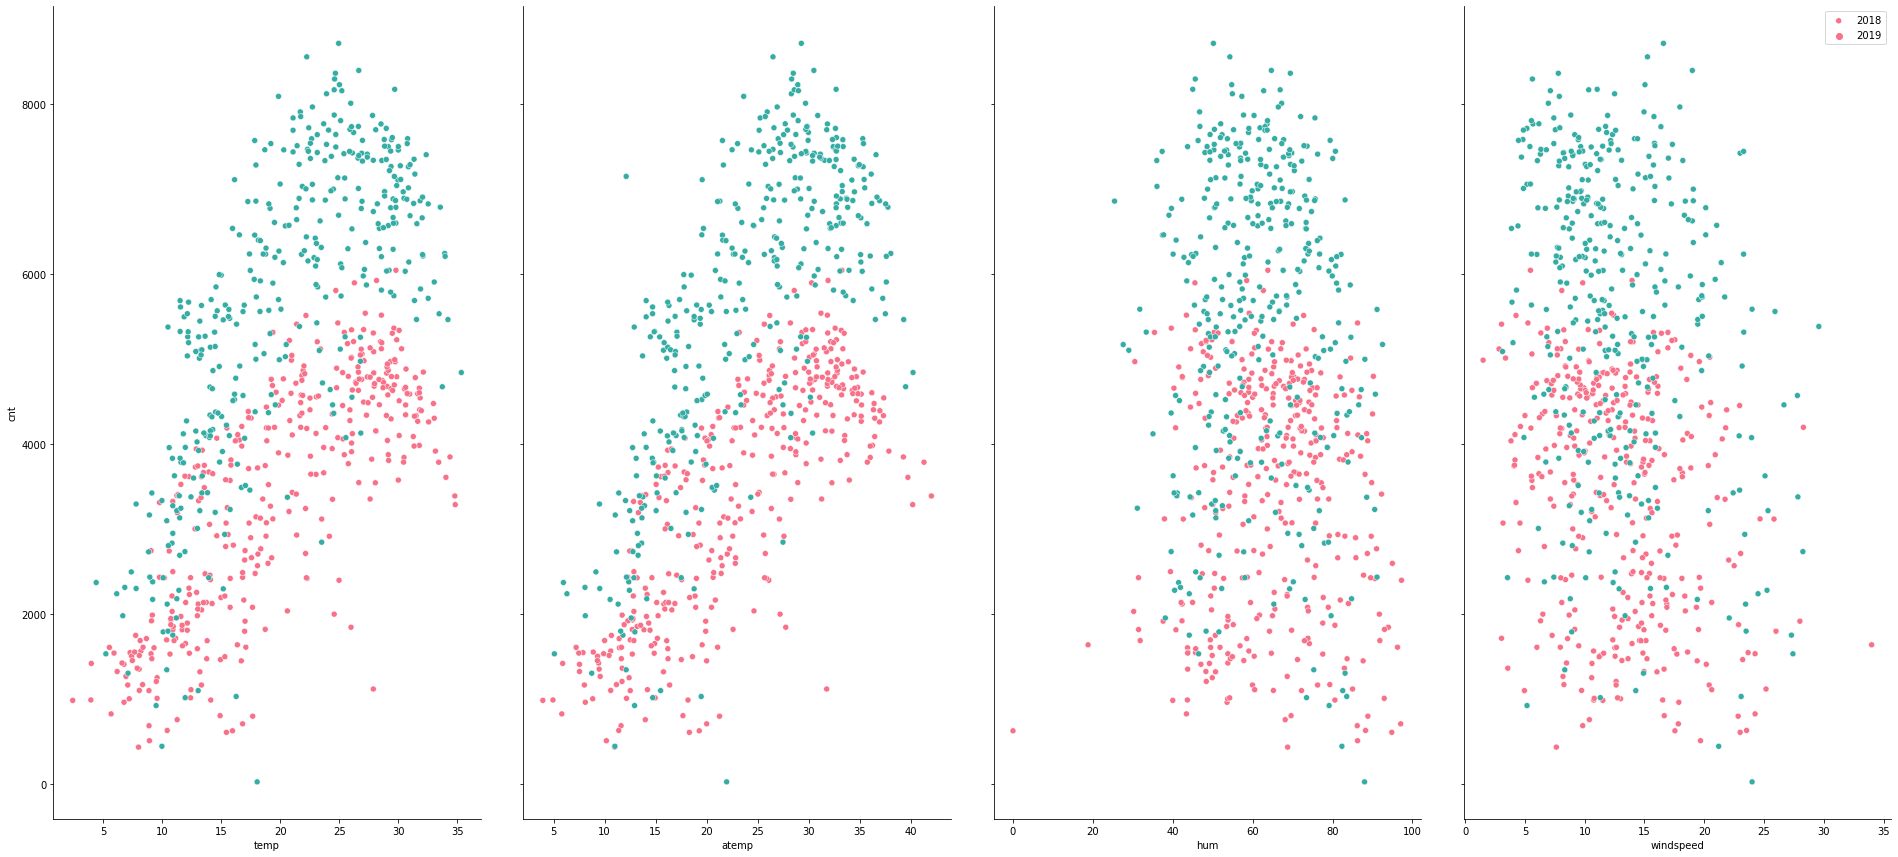

In [16]:
# Checking linear relationship between the cnt variable and other numeric variables
x =sns.pairplot(df, palette='husl', x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars=['cnt'] , hue='yr' )
x._legend.remove()
x.fig.set_size_inches(30,15)
plt.legend(labels=['2018', '2019'])
plt.show()

 There is some corelation between Feeling Temperature and sales. Also the count in 2019 are much higher than the count in 2018 for all circumstances.

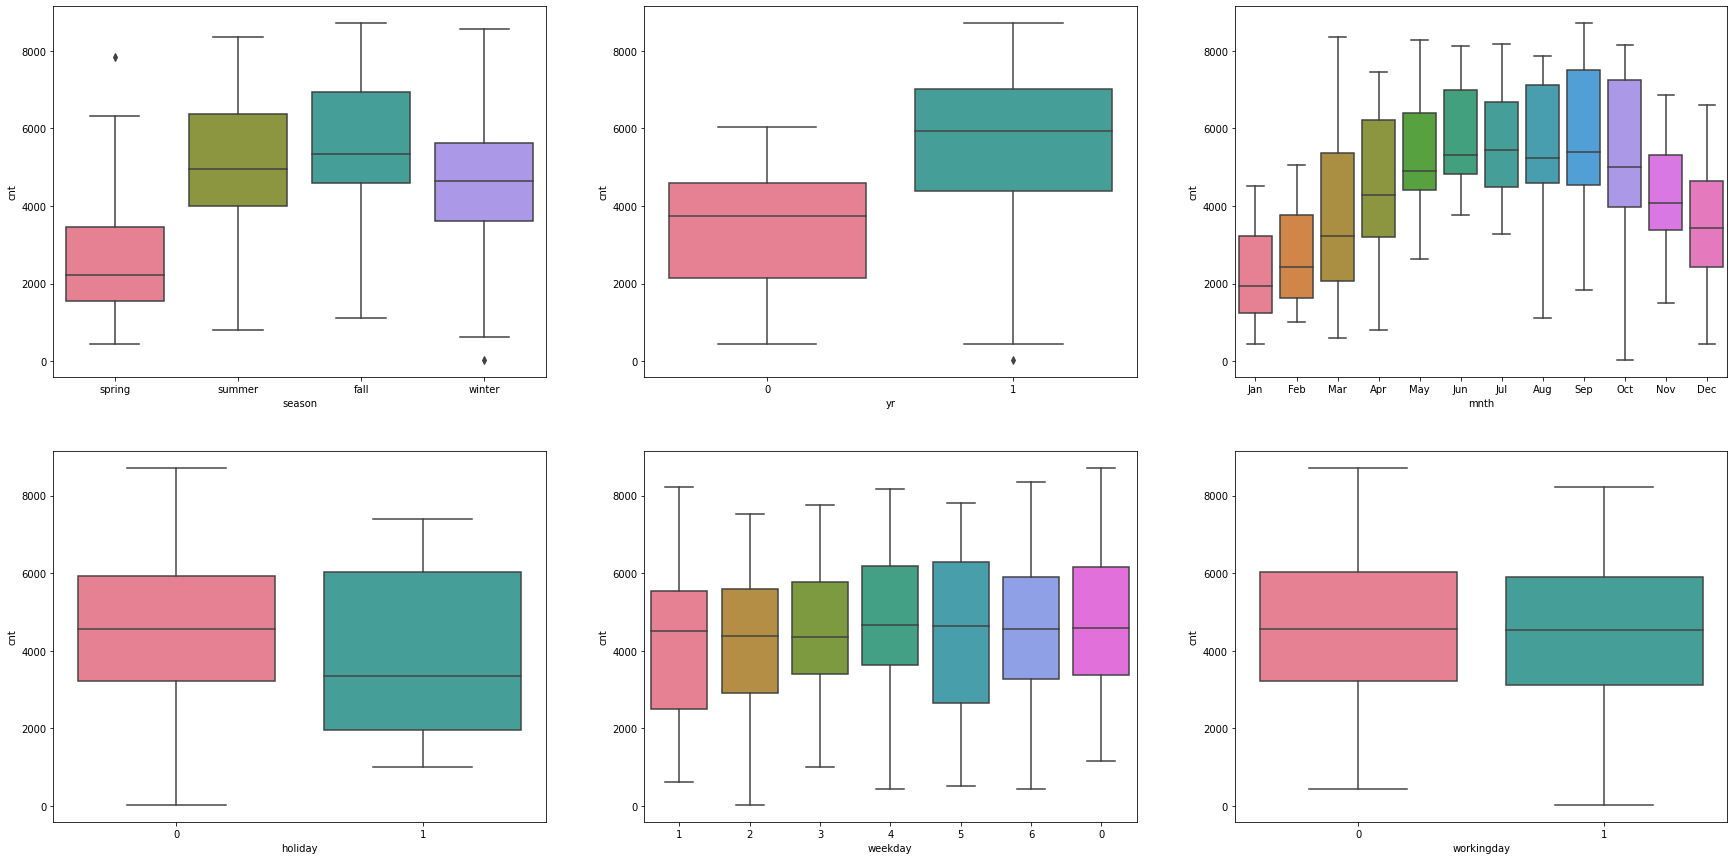

In [17]:
# Checking the distribution of rentals across different categorical variables
plt.figure(figsize=(30,15))
plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data=df, palette='husl')
plt.subplot(2,3,2)
sns.boxplot(x='yr', y='cnt', data=df, palette='husl')
plt.subplot(2,3,3)
sns.boxplot(x='mnth', y='cnt', data=df, palette='husl')
plt.subplot(2,3,4)
sns.boxplot(x='holiday', y='cnt', data=df, palette='husl')
plt.subplot(2,3,5)
sns.boxplot(x='weekday', y='cnt', data=df, palette='husl')
plt.subplot(2,3,6)
sns.boxplot(x='workingday', y='cnt', data=df, palette='husl')

plt.show()

It seems that during the summer months, the registration count picks up.

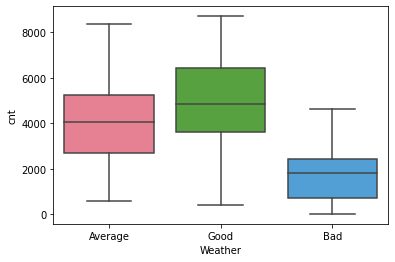

In [18]:
sns.boxplot(x='weathersit', y='cnt', data=df, palette='husl')
plt.xlabel('Weather')
plt.show()

Count picks up in Good Weather days

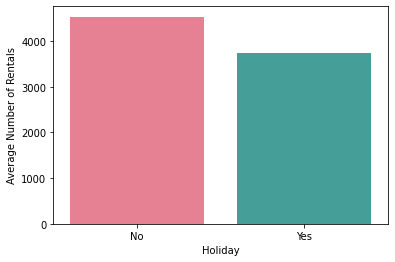

In [19]:
# Checking business on Holidays
holiday_df = df.groupby(['holiday'])['cnt'].mean().reset_index()
sns.barplot(x='holiday', y='cnt', data=holiday_df, palette='husl')
plt.xticks(np.arange(2),('No','Yes'))
plt.xlabel('Holiday')
plt.ylabel('Average Number of Rentals')
plt.show()

Non Holidays have slight higher average rentals

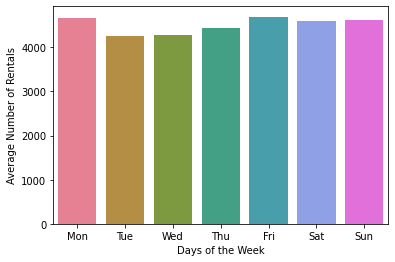

In [20]:
# Total rentals on different days of the week.
weekday_df = df.groupby(['weekday'])['cnt'].mean().reset_index()
sns.barplot(x='weekday', y='cnt', data=weekday_df, palette='husl')
plt.xticks(np.arange(7),('Mon','Tue','Wed','Thu', 'Fri', 'Sat', 'Sun'))
plt.xlabel('Days of the Week')
plt.ylabel('Average Number of Rentals')
plt.show()

Rental demands are almost same throughout the week

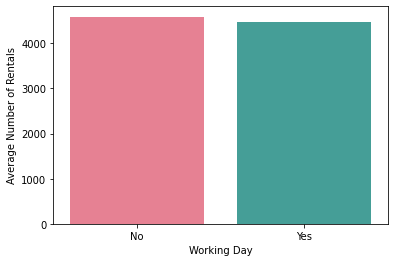

In [21]:
# Checking business on Workingdays
workingday_df = df.groupby(['workingday'])['cnt'].mean().reset_index()
sns.barplot(x='workingday', y='cnt', data=workingday_df, palette='husl')
plt.xticks(np.arange(2),('No','Yes'))
plt.xlabel('Working Day')
plt.ylabel('Average Number of Rentals')
plt.show()

# **Creating Dummy Variables for Categorical Data**

In [22]:
#Dummy variables are created for season,mnth,weekday and weathersit
dummy = pd.get_dummies(df[['season','mnth','weekday','weathersit']], drop_first=True)
dummy.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Bad,weathersit_Good
instant,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [23]:
df = pd.concat([df,dummy], axis=1)   #horizontal stacking
df = df.drop(['season','mnth','weekday','weathersit'], axis=1)
df.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Bad,weathersit_Good
instant,,,,,,,,,,,,,,,,,,,,,
1,2018-01-01,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
2,2018-02-01,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,1,0,0,0,0,0,0
3,2018-03-01,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,1,0,0,0,0,1
4,2018-04-01,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,1,0,0,0,1
5,2018-05-01,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,1,0,0,1


In [24]:
print('Shape of the new dataframe is:' , df.shape)

Shape of the new dataframe is: (730, 31)


In [25]:
# There are month and year column, so dropping the dteday column
df.drop('dteday', inplace=True, axis = 1)

In [26]:
# Moving the cnt to the end for easier identification
x = df.pop('cnt')
df['cnt'] = x

# **Splitting the data into Train and Test Dataset**

In [27]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100) #70:30 ratio for train and test

In [28]:
print('Shape of the Train data is:' , df_train.shape)
print('Shape of the Test data is:' , df_test.shape)

Shape of the Train data is: (510, 30)
Shape of the Test data is: (220, 30)


In [29]:
# Checking the Train Data
pd.set_option('display.max_columns', None)
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Bad,weathersit_Good,cnt
instant,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
577,1,0,1,29.246653,33.1448,70.4167,11.083475,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,7216
427,1,0,0,16.980847,20.6746,62.1250,10.792293,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4066
729,1,0,1,10.489153,11.5850,48.3333,23.500518,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1796
483,1,0,0,15.443347,18.8752,48.9583,8.708325,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4220
112,0,0,0,13.803347,16.0977,72.9583,14.707907,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1683



All other categorical values have been encoded.

# **Feature Scaling**

In [30]:
#MinMax scaling
scaler = MinMaxScaler()    #Instantiating the object
cols = df_train.columns
df_train[cols] = scaler.fit_transform(df_train[cols])

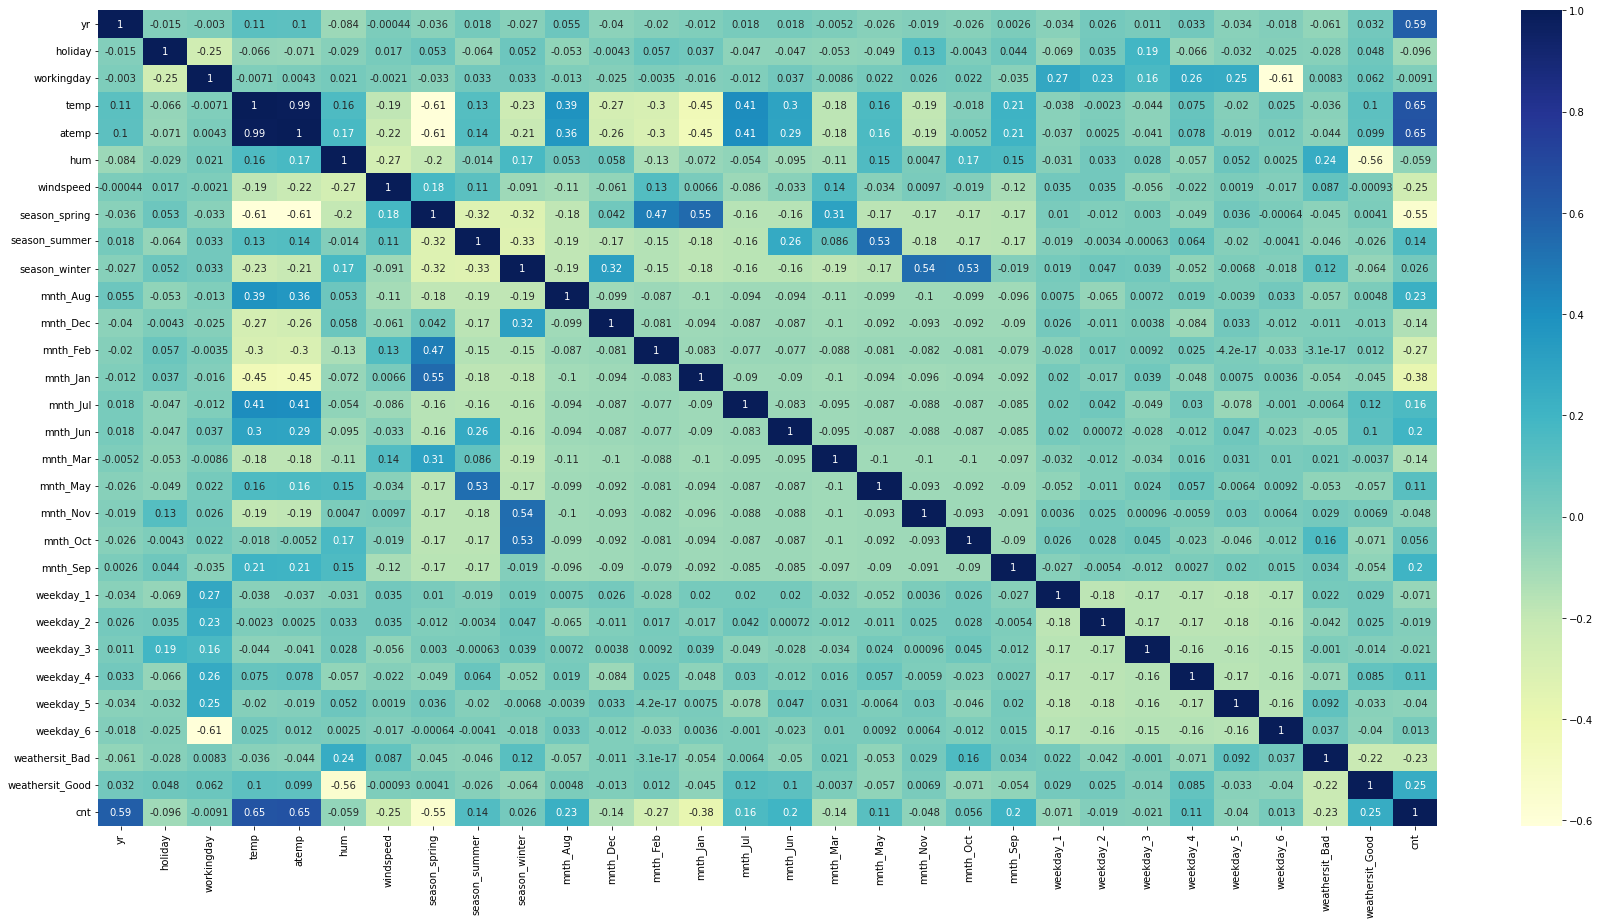

In [31]:
# Checking the Heatmap
plt.figure(figsize=(30,15))
sns.heatmap(df_train.corr(),annot=True, cmap='YlGnBu')
plt.show()

cnt has strong colinearity with yr, temp, atemp.


But, temp and atemp have almost a perfect colinearity, atemp might be a derived variable from temp

# **Building the Model**

There will be iterations until there is no further improvement in the R2 value or all variables are statistically significant with low VIF.

In [32]:
y_train = df_train.pop('cnt')
X_train = df_train
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model1 = lr.fit()
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     93.97
Date:                Thu, 28 Oct 2021   Prob (F-statistic):          1.24e-177
Time:                        07:04:57   Log-Likelihood:                 523.07
No. Observations:                 510   AIC:                            -986.1
Df Residuals:                     480   BIC:                            -859.1
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2838      0.047      6.021      0.000       0.191       0.376
yr                  0.2312      0.008     28.360      0.000       0.215       0.247
holiday            -0.1345      0.066     -2.054      0.041      -0.263      -0.006
workingday         -0.0605      0.071     -0.849      0.396      -0.200       0.079
temp                0.3873      0.143      2.699      0.007       0.105       0.669
atemp               0.0547      0.139      0.392      0.695      -0.219       0.329
hum                -0.1579      0.039     -4.050      0.000      -0.234      -0.081
windspeed          -0.1802      0.027     -6.751      0.000      -0.233      -0.128
season_spring      -0.0409      0.030     -1.349      0.178      -0.100       0.019
season_summer       0.0458      0.026      1.733      0.084      -0.006       0.098
season_winter       0.1121      0.028      3.969      0.000       0.057       0.168
mnth_Aug            0.0291      0.034      0.849      0.396      -0.038       0.096
mnth_Dec           -0.0444      0.034     -1.308      0.191      -0.111       0.022
mnth_Feb           -0.0373      0.033     -1.119      0.264      -0.103       0.028
mnth_Jan           -0.0640      0.034     -1.887      0.060      -0.131       0.003
mnth_Jul           -0.0274      0.035     -0.773      0.440      -0.097       0.042
mnth_Jun            0.0097      0.025      0.384      0.701      -0.040       0.059
mnth_Mar            0.0010      0.025      0.041      0.967      -0.048       0.050
mnth_May            0.0256      0.021      1.196      0.232      -0.016       0.068
mnth_Nov           -0.0395      0.037     -1.076      0.282      -0.112       0.033
mnth_Oct            0.0058      0.036      0.159      0.874      -0.065       0.077
mnth_Sep            0.0916      0.032      2.837      0.005       0.028       0.155
weekday_1           0.0252      0.072      0.352      0.725      -0.116       0.166
weekday_2           0.0238      0.071      0.333      0.739      -0.116       0.164
weekday_3           0.0396      0.071      0.560      0.576      -0.100       0.179
weekday_4           0.0541      0.072      0.753      0.452      -0.087       0.195
weekday_5           0.0499      0.072      0.696      0.487      -0.091       0.191
weekday_6          -0.0058      0.015     -0.378      0.706      -0.036       0.025
weathersit_Bad     -0.1914      0.025     -7.569      0.000      -0.241      -0.142
weathersit_Good     0.0578      0.011      5.486      0.000       0.037       0.079
==============================================================================
Omnibus:                       78.724   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.783
Skew:                          -0.768   Prob(JB):                     7.59

In [33]:
# Checking VIF (Variance Inflation Factor - MultiCollinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,438.82
4,atemp,382.21
2,workingday,229.65
21,weekday_1,50.78
22,weekday_2,49.61
25,weekday_5,48.16
24,weekday_4,47.09
23,weekday_3,43.27
5,hum,34.56
7,season_spring,12.18


The R-squared is a significant 85%, but there are insignificant variables and variables with strong multicollinearity First the columns with High P Values are to be removed and then when the P Values are acceptable for all the columns, the VIF values will be considered for futher removal.

In [34]:
# Removing 'mnth_Mar' due to high P-Value
X = X_train.drop('mnth_Mar',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model2 = lr.fit()
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     97.53
Date:                Thu, 28 Oct 2021   Prob (F-statistic):          1.24e-178
Time:                        07:04:58   Log-Likelihood:                 523.07
No. Observations:                 510   AIC:                            -988.1
Df Residuals:                     481   BIC:                            -865.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2844      0.044      6.420      0.000       0.197       0.371
yr                  0.2312      0.008     28.389      0.000       0.215       0.247
holiday            -0.1345      0.065     -2.056      0.040      -0.263      -0.006
workingday         -0.0605      0.071     -0.850      0.396      -0.200       0.079
temp                0.3871      0.143      2.702      0.007       0.106       0.669
atemp               0.0545      0.139      0.392      0.695      -0.219       0.328
hum                -0.1577      0.039     -4.064      0.000      -0.234      -0.081
windspeed          -0.1803      0.027     -6.769      0.000      -0.233      -0.128
season_spring      -0.0405      0.029     -1.413      0.158      -0.097       0.016
season_summer       0.0456      0.026      1.759      0.079      -0.005       0.097
season_winter       0.1123      0.028      4.052      0.000       0.058       0.167
mnth_Aug            0.0286      0.032      0.886      0.376      -0.035       0.092
mnth_Dec           -0.0453      0.026     -1.725      0.085      -0.097       0.006
mnth_Feb           -0.0383      0.023     -1.702      0.089      -0.083       0.006
mnth_Jan           -0.0651      0.023     -2.882      0.004      -0.109      -0.021
mnth_Jul           -0.0278      0.034     -0.824      0.410      -0.094       0.038
mnth_Jun            0.0094      0.024      0.392      0.695      -0.038       0.056
mnth_May            0.0252      0.020      1.264      0.207      -0.014       0.064
mnth_Nov           -0.0404      0.031     -1.297      0.195      -0.101       0.021
mnth_Oct            0.0050      0.031      0.161      0.872      -0.056       0.066
mnth_Sep            0.0910      0.029      3.106      0.002       0.033       0.149
weekday_1           0.0252      0.072      0.351      0.725      -0.116       0.166
weekday_2           0.0237      0.071      0.333      0.739      -0.116       0.164
weekday_3           0.0396      0.071      0.560      0.576      -0.099       0.179
weekday_4           0.0541      0.072      0.753      0.452      -0.087       0.195
weekday_5           0.0499      0.072      0.696      0.487      -0.091       0.191
weekday_6          -0.0059      0.015     -0.379      0.705      -0.036       0.025
weathersit_Bad     -0.1914      0.025     -7.577      0.000      -0.241      -0.142
weathersit_Good     0.0578      0.011      5.493      0.000       0.037       0.078
==============================================================================
Omnibus:                       78.698   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.896
Skew:                          -0.767   Prob(JB):                     7.18e-46
Kurtosis:                       5.726   Cond. No.                         96.2


In [35]:
# Removing 'mnth_Oct' due to high P-Value
X = X.drop('mnth_Oct',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model3 = lr.fit()
lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.3
Date:                Thu, 28 Oct 2021   Prob (F-statistic):          1.24e-179
Time:                        07:04:58   Log-Likelihood:                 523.05
No. Observations:                 510   AIC:                            -990.1
Df Residuals:                     482   BIC:                            -871.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2856      0.044      6.543      0.000       0.200       0.371
yr                  0.2312      0.008     28.442      0.000       0.215       0.247
holiday            -0.1345      0.065     -2.057      0.040      -0.263      -0.006
workingday         -0.0608      0.071     -0.855      0.393      -0.200       0.079
temp                0.3875      0.143      2.708      0.007       0.106       0.669
atemp               0.0546      0.139      0.393      0.695      -0.219       0.328
hum                -0.1571      0.039     -4.072      0.000      -0.233      -0.081
windspeed          -0.1801      0.027     -6.774      0.000      -0.232      -0.128
season_spring      -0.0414      0.028     -1.478      0.140      -0.096       0.014
season_summer       0.0440      0.024      1.839      0.067      -0.003       0.091
season_winter       0.1144      0.024      4.672      0.000       0.066       0.163
mnth_Aug            0.0266      0.030      0.894      0.372      -0.032       0.085
mnth_Dec           -0.0483      0.019     -2.594      0.010      -0.085      -0.012
mnth_Feb           -0.0391      0.022     -1.785      0.075      -0.082       0.004
mnth_Jan           -0.0658      0.022     -2.990      0.003      -0.109      -0.023
mnth_Jul           -0.0298      0.031     -0.952      0.341      -0.091       0.032
mnth_Jun            0.0084      0.023      0.364      0.716      -0.037       0.054
mnth_May            0.0249      0.020      1.255      0.210      -0.014       0.064
mnth_Nov           -0.0443      0.019     -2.294      0.022      -0.082      -0.006
mnth_Sep            0.0886      0.025      3.542      0.000       0.039       0.138
weekday_1           0.0256      0.072      0.358      0.721      -0.115       0.166
weekday_2           0.0240      0.071      0.337      0.736      -0.116       0.164
weekday_3           0.0399      0.071      0.565      0.572      -0.099       0.179
weekday_4           0.0544      0.072      0.758      0.449      -0.086       0.195
weekday_5           0.0501      0.072      0.701      0.484      -0.090       0.191
weekday_6          -0.0058      0.015     -0.376      0.707      -0.036       0.025
weathersit_Bad     -0.1913      0.025     -7.584      0.000      -0.241      -0.142
weathersit_Good     0.0579      0.011      5.505      0.000       0.037       0.079
==============================================================================
Omnibus:                       78.141   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.276
Skew:                          -0.764   Prob(JB):                     2.66e-45
Kurtosis:                       5.707   Cond. No.                         96.1
==============================================================================

Note

In [36]:
# Removing 'weekday_2' due to high P-Value
X = X.drop('weekday_2',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model4 = lr.fit()
lr_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.4
Date:                Thu, 28 Oct 2021   Prob (F-statistic):          1.26e-180
Time:                        07:04:59   Log-Likelihood:                 522.99
No. Observations:                 510   AIC:                            -992.0
Df Residuals:                     483   BIC:                            -877.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2852      0.044      6.542      0.000       0.200       0.371
yr                  0.2313      0.008     28.539      0.000       0.215       0.247
holiday            -0.1147      0.029     -4.002      0.000      -0.171      -0.058
workingday         -0.0373      0.015     -2.521      0.012      -0.066      -0.008
temp                0.3887      0.143      2.720      0.007       0.108       0.670
atemp               0.0540      0.139      0.389      0.698      -0.219       0.327
hum                -0.1565      0.039     -4.064      0.000      -0.232      -0.081
windspeed          -0.1803      0.027     -6.790      0.000      -0.233      -0.128
season_spring      -0.0413      0.028     -1.477      0.140      -0.096       0.014
season_summer       0.0440      0.024      1.841      0.066      -0.003       0.091
season_winter       0.1143      0.024      4.672      0.000       0.066       0.162
mnth_Aug            0.0262      0.030      0.883      0.378      -0.032       0.085
mnth_Dec           -0.0482      0.019     -2.591      0.010      -0.085      -0.012
mnth_Feb           -0.0389      0.022     -1.778      0.076      -0.082       0.004
mnth_Jan           -0.0657      0.022     -2.987      0.003      -0.109      -0.022
mnth_Jul           -0.0302      0.031     -0.964      0.336      -0.092       0.031
mnth_Jun            0.0082      0.023      0.352      0.725      -0.037       0.054
mnth_May            0.0246      0.020      1.243      0.214      -0.014       0.063
mnth_Nov           -0.0449      0.019     -2.339      0.020      -0.083      -0.007
mnth_Sep            0.0885      0.025      3.542      0.000       0.039       0.138
weekday_1           0.0020      0.014      0.137      0.891      -0.026       0.030
weekday_3           0.0166      0.015      1.122      0.262      -0.012       0.046
weekday_4           0.0307      0.015      2.094      0.037       0.002       0.060
weekday_5           0.0265      0.015      1.816      0.070      -0.002       0.055
weekday_6          -0.0063      0.015     -0.413      0.680      -0.036       0.024
weathersit_Bad     -0.1913      0.025     -7.592      0.000      -0.241      -0.142
weathersit_Good     0.0579      0.011      5.511      0.000       0.037       0.078
==============================================================================
Omnibus:                       78.071   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.184
Skew:                          -0.766   Prob(JB):                     7.57e-45
Kurtosis:                       5.686   Cond. No.                         95.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly 

In [37]:

# Removing 'mnth_Jun' due to high P-Value
X = X.drop('mnth_Jun',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model5 = lr.fit()
lr_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     109.8
Date:                Thu, 28 Oct 2021   Prob (F-statistic):          1.27e-181
Time:                        07:04:59   Log-Likelihood:                 522.93
No. Observations:                 510   AIC:                            -993.9
Df Residuals:                     484   BIC:                            -883.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2861      0.043      6.578      0.000       0.201       0.372
yr                  0.2311      0.008     28.648      0.000       0.215       0.247
holiday            -0.1153      0.029     -4.036      0.000      -0.171      -0.059
workingday         -0.0372      0.015     -2.516      0.012      -0.066      -0.008
temp                0.4038      0.136      2.964      0.003       0.136       0.672
atemp               0.0473      0.138      0.344      0.731      -0.223       0.318
hum                -0.1584      0.038     -4.153      0.000      -0.233      -0.083
windspeed          -0.1816      0.026     -6.908      0.000      -0.233      -0.130
season_spring      -0.0440      0.027     -1.632      0.103      -0.097       0.009
season_summer       0.0427      0.024      1.810      0.071      -0.004       0.089
season_winter       0.1114      0.023      4.836      0.000       0.066       0.157
mnth_Aug            0.0200      0.024      0.837      0.403      -0.027       0.067
mnth_Dec           -0.0473      0.018     -2.569      0.011      -0.083      -0.011
mnth_Feb           -0.0378      0.022     -1.747      0.081      -0.080       0.005
mnth_Jan           -0.0640      0.021     -2.984      0.003      -0.106      -0.022
mnth_Jul           -0.0368      0.025     -1.476      0.141      -0.086       0.012
mnth_May            0.0213      0.017      1.221      0.223      -0.013       0.056
mnth_Nov           -0.0444      0.019     -2.320      0.021      -0.082      -0.007
mnth_Sep            0.0841      0.022      3.887      0.000       0.042       0.127
weekday_1           0.0021      0.014      0.147      0.883      -0.026       0.030
weekday_3           0.0166      0.015      1.121      0.263      -0.012       0.046
weekday_4           0.0304      0.015      2.079      0.038       0.002       0.059
weekday_5           0.0265      0.015      1.817      0.070      -0.002       0.055
weekday_6          -0.0064      0.015     -0.420      0.675      -0.037       0.024
weathersit_Bad     -0.1915      0.025     -7.610      0.000      -0.241      -0.142
weathersit_Good     0.0577      0.010      5.505      0.000       0.037       0.078
==============================================================================
Omnibus:                       77.475   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.014
Skew:                          -0.765   Prob(JB):                     6.09e-44
Kurtosis:                       5.650   Cond. No.                         93.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:

# Removing 'atemp' due to high P-Value
X = X.drop('atemp',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model6 = lr.fit()
lr_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     114.6
Date:                Thu, 28 Oct 2021   Prob (F-statistic):          1.24e-182
Time:                        07:04:59   Log-Likelihood:                 522.87
No. Observations:                 510   AIC:                            -995.7
Df Residuals:                     485   BIC:                            -889.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2859      0.043      6.581      0.000       0.201       0.371
yr                  0.2310      0.008     28.672      0.000       0.215       0.247
holiday            -0.1157      0.029     -4.055      0.000      -0.172      -0.060
workingday         -0.0372      0.015     -2.515      0.012      -0.066      -0.008
temp                0.4487      0.039     11.570      0.000       0.373       0.525
hum                -0.1577      0.038     -4.145      0.000      -0.232      -0.083
windspeed          -0.1834      0.026     -7.124      0.000      -0.234      -0.133
season_spring      -0.0433      0.027     -1.612      0.108      -0.096       0.009
season_summer       0.0435      0.023      1.851      0.065      -0.003       0.090
season_winter       0.1122      0.023      4.901      0.000       0.067       0.157
mnth_Aug            0.0194      0.024      0.813      0.416      -0.027       0.066
mnth_Dec           -0.0472      0.018     -2.568      0.011      -0.083      -0.011
mnth_Feb           -0.0379      0.022     -1.752      0.080      -0.080       0.005
mnth_Jan           -0.0642      0.021     -2.997      0.003      -0.106      -0.022
mnth_Jul           -0.0368      0.025     -1.478      0.140      -0.086       0.012
mnth_May            0.0211      0.017      1.210      0.227      -0.013       0.055
mnth_Nov           -0.0443      0.019     -2.319      0.021      -0.082      -0.007
mnth_Sep            0.0841      0.022      3.892      0.000       0.042       0.127
weekday_1           0.0021      0.014      0.145      0.885      -0.026       0.030
weekday_3           0.0166      0.015      1.120      0.263      -0.012       0.046
weekday_4           0.0304      0.015      2.082      0.038       0.002       0.059
weekday_5           0.0265      0.015      1.815      0.070      -0.002       0.055
weekday_6          -0.0068      0.015     -0.444      0.657      -0.037       0.023
weathersit_Bad     -0.1921      0.025     -7.655      0.000      -0.241      -0.143
weathersit_Good     0.0577      0.010      5.517      0.000       0.037       0.078
==============================================================================
Omnibus:                       76.945   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.512
Skew:                          -0.760   Prob(JB):                     1.29e-43
Kurtosis:                       5.643   Cond. No.                         28.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# Removing 'weekday_1' due to high P-Value
X = X.drop('weekday_1',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model7 = lr.fit()
lr_model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     119.8
Date:                Thu, 28 Oct 2021   Prob (F-statistic):          1.13e-183
Time:                        07:05:00   Log-Likelihood:                 522.86
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     486   BIC:                            -896.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2862      0.043      6.600      0.000       0.201       0.371
yr                  0.2310      0.008     28.714      0.000       0.215       0.247
holiday            -0.1150      0.028     -4.085      0.000      -0.170      -0.060
workingday         -0.0361      0.013     -2.801      0.005      -0.061      -0.011
temp                0.4486      0.039     11.581      0.000       0.373       0.525
hum                -0.1580      0.038     -4.161      0.000      -0.233      -0.083
windspeed          -0.1835      0.026     -7.136      0.000      -0.234      -0.133
season_spring      -0.0433      0.027     -1.613      0.107      -0.096       0.009
season_summer       0.0435      0.023      1.854      0.064      -0.003       0.090
season_winter       0.1122      0.023      4.905      0.000       0.067       0.157
mnth_Aug            0.0195      0.024      0.820      0.412      -0.027       0.066
mnth_Dec           -0.0472      0.018     -2.568      0.011      -0.083      -0.011
mnth_Feb           -0.0380      0.022     -1.758      0.079      -0.080       0.004
mnth_Jan           -0.0642      0.021     -2.999      0.003      -0.106      -0.022
mnth_Jul           -0.0368      0.025     -1.479      0.140      -0.086       0.012
mnth_May            0.0211      0.017      1.209      0.227      -0.013       0.055
mnth_Nov           -0.0443      0.019     -2.322      0.021      -0.082      -0.007
mnth_Sep            0.0841      0.022      3.898      0.000       0.042       0.127
weekday_3           0.0156      0.013      1.193      0.234      -0.010       0.041
weekday_4           0.0294      0.013      2.308      0.021       0.004       0.054
weekday_5           0.0254      0.013      2.011      0.045       0.001       0.050
weekday_6          -0.0068      0.015     -0.446      0.656      -0.037       0.023
weathersit_Bad     -0.1919      0.025     -7.667      0.000      -0.241      -0.143
weathersit_Good     0.0577      0.010      5.521      0.000       0.037       0.078
==============================================================================
Omnibus:                       76.802   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.626
Skew:                          -0.758   Prob(JB):                     1.22e-43
Kurtosis:                       5.646   Cond. No.                         28.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# Removing 'weekday_6' due to high P-Value
X = X.drop('weekday_6',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model8 = lr.fit()
lr_model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     125.5
Date:                Thu, 28 Oct 2021   Prob (F-statistic):          1.10e-184
Time:                        07:05:00   Log-Likelihood:                 522.75
No. Observations:                 510   AIC:                            -999.5
Df Residuals:                     487   BIC:                            -902.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2833      0.043      6.613      0.000       0.199       0.367
yr                  0.2311      0.008     28.764      0.000       0.215       0.247
holiday            -0.1122      0.027     -4.093      0.000      -0.166      -0.058
workingday         -0.0328      0.011     -3.105      0.002      -0.054      -0.012
temp                0.4483      0.039     11.584      0.000       0.372       0.524
hum                -0.1580      0.038     -4.165      0.000      -0.233      -0.083
windspeed          -0.1832      0.026     -7.133      0.000      -0.234      -0.133
season_spring      -0.0437      0.027     -1.630      0.104      -0.096       0.009
season_summer       0.0432      0.023      1.844      0.066      -0.003       0.089
season_winter       0.1120      0.023      4.901      0.000       0.067       0.157
mnth_Aug            0.0192      0.024      0.809      0.419      -0.027       0.066
mnth_Dec           -0.0470      0.018     -2.563      0.011      -0.083      -0.011
mnth_Feb           -0.0377      0.022     -1.750      0.081      -0.080       0.005
mnth_Jan           -0.0642      0.021     -3.003      0.003      -0.106      -0.022
mnth_Jul           -0.0368      0.025     -1.479      0.140      -0.086       0.012
mnth_May            0.0210      0.017      1.205      0.229      -0.013       0.055
mnth_Nov           -0.0448      0.019     -2.353      0.019      -0.082      -0.007
mnth_Sep            0.0840      0.022      3.894      0.000       0.042       0.126
weekday_3           0.0157      0.013      1.200      0.231      -0.010       0.041
weekday_4           0.0294      0.013      2.313      0.021       0.004       0.054
weekday_5           0.0255      0.013      2.018      0.044       0.001       0.050
weathersit_Bad     -0.1925      0.025     -7.709      0.000      -0.242      -0.143
weathersit_Good     0.0576      0.010      5.516      0.000       0.037       0.078
==============================================================================
Omnibus:                       75.707   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.557
Skew:                          -0.748   Prob(JB):                     5.66e-43
Kurtosis:                       5.630   Cond. No.                         28.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# Removing 'mnth_Aug' due to high P-Value
X = X.drop('mnth_Aug',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model9 = lr.fit()
lr_model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     131.5
Date:                Thu, 28 Oct 2021   Prob (F-statistic):          1.31e-185
Time:                        07:05:00   Log-Likelihood:                 522.41
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     488   BIC:                            -907.7
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2945      0.041      7.264      0.000       0.215       0.374
yr                  0.2313      0.008     28.805      0.000       0.215       0.247
holiday            -0.1129      0.027     -4.119      0.000      -0.167      -0.059
workingday         -0.0329      0.011     -3.111      0.002      -0.054      -0.012
temp                0.4506      0.039     11.682      0.000       0.375       0.526
hum                -0.1567      0.038     -4.135      0.000      -0.231      -0.082
windspeed          -0.1834      0.026     -7.143      0.000      -0.234      -0.133
season_spring      -0.0559      0.022     -2.533      0.012      -0.099      -0.013
season_summer       0.0302      0.017      1.773      0.077      -0.003       0.064
season_winter       0.1006      0.018      5.599      0.000       0.065       0.136
mnth_Dec           -0.0479      0.018     -2.617      0.009      -0.084      -0.012
mnth_Feb           -0.0377      0.022     -1.751      0.081      -0.080       0.005
mnth_Jan           -0.0642      0.021     -3.003      0.003      -0.106      -0.022
mnth_Jul           -0.0505      0.018     -2.783      0.006      -0.086      -0.015
mnth_May            0.0205      0.017      1.180      0.239      -0.014       0.055
mnth_Nov           -0.0460      0.019     -2.422      0.016      -0.083      -0.009
mnth_Sep            0.0730      0.017      4.354      0.000       0.040       0.106
weekday_3           0.0158      0.013      1.211      0.226      -0.010       0.041
weekday_4           0.0294      0.013      2.314      0.021       0.004       0.054
weekday_5           0.0251      0.013      1.985      0.048       0.000       0.050
weathersit_Bad     -0.1937      0.025     -7.777      0.000      -0.243      -0.145
weathersit_Good     0.0573      0.010      5.492      0.000       0.037       0.078
==============================================================================
Omnibus:                       76.849   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.285
Skew:                          -0.759   Prob(JB):                     1.45e-43
Kurtosis:                       5.642   Cond. No.                         26.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Removing 'mnth_May' due to high P-Value
X = X.drop('mnth_May',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model10 = lr.fit()
lr_model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     137.9
Date:                Thu, 28 Oct 2021   Prob (F-statistic):          2.20e-186
Time:                        07:05:01   Log-Likelihood:                 521.68
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     489   BIC:                            -912.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2850      0.040      7.169      0.000       0.207       0.363
yr                  0.2307      0.008     28.772      0.000       0.215       0.246
holiday            -0.1140      0.027     -4.162      0.000      -0.168      -0.060
workingday         -0.0332      0.011     -3.140      0.002      -0.054      -0.012
temp                0.4587      0.038     12.074      0.000       0.384       0.533
hum                -0.1510      0.038     -4.017      0.000      -0.225      -0.077
windspeed          -0.1848      0.026     -7.204      0.000      -0.235      -0.134
season_spring      -0.0525      0.022     -2.397      0.017      -0.095      -0.009
season_summer       0.0390      0.015      2.545      0.011       0.009       0.069
season_winter       0.1024      0.018      5.721      0.000       0.067       0.138
mnth_Dec           -0.0467      0.018     -2.552      0.011      -0.083      -0.011
mnth_Feb           -0.0365      0.022     -1.696      0.091      -0.079       0.006
mnth_Jan           -0.0627      0.021     -2.937      0.003      -0.105      -0.021
mnth_Jul           -0.0509      0.018     -2.803      0.005      -0.087      -0.015
mnth_Nov           -0.0444      0.019     -2.346      0.019      -0.082      -0.007
mnth_Sep            0.0730      0.017      4.354      0.000       0.040       0.106
weekday_3           0.0165      0.013      1.263      0.207      -0.009       0.042
weekday_4           0.0300      0.013      2.361      0.019       0.005       0.055
weekday_5           0.0252      0.013      2.000      0.046       0.000       0.050
weathersit_Bad     -0.1952      0.025     -7.842      0.000      -0.244      -0.146
weathersit_Good     0.0574      0.010      5.507      0.000       0.037       0.078
==============================================================================
Omnibus:                       75.548   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.343
Skew:                          -0.762   Prob(JB):                     5.67e-41
Kurtosis:                       5.530   Cond. No.                         25.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:

# Removing 'weekday_3' due to high P-Value
X = X.drop('weekday_3',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model11 = lr.fit()
lr_model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     144.9
Date:                Thu, 28 Oct 2021   Prob (F-statistic):          3.98e-187
Time:                        07:05:01   Log-Likelihood:                 520.85
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     490   BIC:                            -917.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2868      0.040      7.216      0.000       0.209       0.365
yr                  0.2309      0.008     28.781      0.000       0.215       0.247
holiday            -0.1045      0.026     -3.965      0.000      -0.156      -0.053
workingday         -0.0284      0.010     -2.876      0.004      -0.048      -0.009
temp                0.4584      0.038     12.059      0.000       0.384       0.533
hum                -0.1516      0.038     -4.030      0.000      -0.225      -0.078
windspeed          -0.1873      0.026     -7.318      0.000      -0.238      -0.137
season_spring      -0.0531      0.022     -2.427      0.016      -0.096      -0.010
season_summer       0.0389      0.015      2.536      0.012       0.009       0.069
season_winter       0.1023      0.018      5.712      0.000       0.067       0.138
mnth_Dec           -0.0469      0.018     -2.563      0.011      -0.083      -0.011
mnth_Feb           -0.0361      0.022     -1.673      0.095      -0.078       0.006
mnth_Jan           -0.0621      0.021     -2.909      0.004      -0.104      -0.020
mnth_Jul           -0.0522      0.018     -2.876      0.004      -0.088      -0.017
mnth_Nov           -0.0454      0.019     -2.396      0.017      -0.083      -0.008
mnth_Sep            0.0725      0.017      4.320      0.000       0.040       0.105
weekday_4           0.0253      0.012      2.080      0.038       0.001       0.049
weekday_5           0.0204      0.012      1.695      0.091      -0.003       0.044
weathersit_Bad     -0.1947      0.025     -7.818      0.000      -0.244      -0.146
weathersit_Good     0.0570      0.010      5.468      0.000       0.037       0.078
==============================================================================
Omnibus:                       75.915   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.955
Skew:                          -0.775   Prob(JB):                     5.08e-40
Kurtosis:                       5.472   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# Removing 'mnth_Feb' due to high P-Value
X = X.drop('mnth_Feb',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model12 = lr.fit()
lr_model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     152.3
Date:                Thu, 28 Oct 2021   Prob (F-statistic):          1.27e-187
Time:                        07:05:01   Log-Likelihood:                 519.40
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     491   BIC:                            -920.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2755      0.039      7.021      0.000       0.198       0.353
yr                  0.2305      0.008     28.694      0.000       0.215       0.246
holiday            -0.1072      0.026     -4.067      0.000      -0.159      -0.055
workingday         -0.0285      0.010     -2.884      0.004      -0.048      -0.009
temp                0.4745      0.037     12.878      0.000       0.402       0.547
hum                -0.1537      0.038     -4.080      0.000      -0.228      -0.080
windspeed          -0.1861      0.026     -7.261      0.000      -0.236      -0.136
season_spring      -0.0631      0.021     -2.985      0.003      -0.105      -0.022
season_summer       0.0422      0.015      2.774      0.006       0.012       0.072
season_winter       0.1041      0.018      5.809      0.000       0.069       0.139
mnth_Dec           -0.0376      0.017     -2.155      0.032      -0.072      -0.003
mnth_Jan           -0.0429      0.018     -2.378      0.018      -0.078      -0.007
mnth_Jul           -0.0532      0.018     -2.926      0.004      -0.089      -0.017
mnth_Nov           -0.0405      0.019     -2.159      0.031      -0.077      -0.004
mnth_Sep            0.0740      0.017      4.410      0.000       0.041       0.107
weekday_4           0.0245      0.012      2.015      0.044       0.001       0.048
weekday_5           0.0204      0.012      1.693      0.091      -0.003       0.044
weathersit_Bad     -0.1937      0.025     -7.765      0.000      -0.243      -0.145
weathersit_Good     0.0568      0.010      5.435      0.000       0.036       0.077
==============================================================================
Omnibus:                       71.224   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.286
Skew:                          -0.733   Prob(JB):                     2.86e-37
Kurtosis:                       5.402   Cond. No.                         24.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# Removing 'weekday_5' due to high P-Value
X = X.drop('weekday_5',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model13 = lr.fit()
lr_model13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.4
Date:                Thu, 28 Oct 2021   Prob (F-statistic):          4.09e-188
Time:                        07:05:02   Log-Likelihood:                 517.91
No. Observations:                 510   AIC:                            -999.8
Df Residuals:                     492   BIC:                            -923.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2743      0.039      6.977      0.000       0.197       0.352
yr                  0.2302      0.008     28.605      0.000       0.214       0.246
holiday            -0.1059      0.026     -4.011      0.000      -0.158      -0.054
workingday         -0.0233      0.009     -2.474      0.014      -0.042      -0.005
temp                0.4779      0.037     12.968      0.000       0.406       0.550
hum                -0.1541      0.038     -4.083      0.000      -0.228      -0.080
windspeed          -0.1867      0.026     -7.271      0.000      -0.237      -0.136
season_spring      -0.0619      0.021     -2.927      0.004      -0.103      -0.020
season_summer       0.0421      0.015      2.758      0.006       0.012       0.072
season_winter       0.1026      0.018      5.723      0.000       0.067       0.138
mnth_Dec           -0.0357      0.017     -2.042      0.042      -0.070      -0.001
mnth_Jan           -0.0427      0.018     -2.367      0.018      -0.078      -0.007
mnth_Jul           -0.0558      0.018     -3.075      0.002      -0.091      -0.020
mnth_Nov           -0.0381      0.019     -2.033      0.043      -0.075      -0.001
mnth_Sep            0.0745      0.017      4.433      0.000       0.042       0.108
weekday_4           0.0195      0.012      1.648      0.100      -0.004       0.043
weathersit_Bad     -0.1901      0.025     -7.635      0.000      -0.239      -0.141
weathersit_Good     0.0564      0.010      5.391      0.000       0.036       0.077
==============================================================================
Omnibus:                       70.139   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.286
Skew:                          -0.730   Prob(JB):                     5.75e-36
Kurtosis:                       5.347   Cond. No.                         24.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# Removing 'weekday_4' due to high P-Value
X = X.drop('weekday_4',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model14 = lr.fit()
lr_model14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.7
Date:                Thu, 28 Oct 2021   Prob (F-statistic):          1.19e-188
Time:                        07:05:02   Log-Likelihood:                 516.51
No. Observations:                 510   AIC:                            -999.0
Df Residuals:                     493   BIC:                            -927.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2753      0.039      6.992      0.000       0.198       0.353
yr                  0.2305      0.008     28.594      0.000       0.215       0.246
holiday            -0.1058      0.026     -4.001      0.000      -0.158      -0.054
workingday         -0.0194      0.009     -2.125      0.034      -0.037      -0.001
temp                0.4787      0.037     12.966      0.000       0.406       0.551
hum                -0.1560      0.038     -4.129      0.000      -0.230      -0.082
windspeed          -0.1879      0.026     -7.309      0.000      -0.238      -0.137
season_spring      -0.0618      0.021     -2.919      0.004      -0.103      -0.020
season_summer       0.0426      0.015      2.791      0.005       0.013       0.073
season_winter       0.1023      0.018      5.698      0.000       0.067       0.138
mnth_Dec           -0.0371      0.017     -2.125      0.034      -0.071      -0.003
mnth_Jan           -0.0437      0.018     -2.417      0.016      -0.079      -0.008
mnth_Jul           -0.0555      0.018     -3.055      0.002      -0.091      -0.020
mnth_Nov           -0.0380      0.019     -2.026      0.043      -0.075      -0.001
mnth_Sep            0.0748      0.017      4.442      0.000       0.042       0.108
weathersit_Bad     -0.1922      0.025     -7.716      0.000      -0.241      -0.143
weathersit_Good     0.0568      0.010      5.421      0.000       0.036       0.077
==============================================================================
Omnibus:                       72.046   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.425
Skew:                          -0.747   Prob(JB):                     4.41e-37
Kurtosis:                       5.377   Cond. No.                         24.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 The P Value <= 0.05 for all the columns, which signifies that these variables are statistically significant.

In [47]:
# Checking VIF (Variance Inflation Factor - MultiCollinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,26.81
3,temp,21.41
6,season_spring,4.98
5,windspeed,4.72
8,season_winter,4.35
2,workingday,3.73
15,weathersit_Good,3.67
7,season_summer,3.01
0,yr,2.09
12,mnth_Nov,1.87


Humidity and Temperature have a high VIF, which means they have multicollinearity and one of them must be removed and checked again.

In [48]:

# Removing 'hum' due to high VIF
X = X.drop('hum',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model15 = lr.fit()
lr_model15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.2
Date:                Thu, 28 Oct 2021   Prob (F-statistic):          3.69e-186
Time:                        07:05:03   Log-Likelihood:                 507.84
No. Observations:                 510   AIC:                            -983.7
Df Residuals:                     494   BIC:                            -915.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1808      0.033      5.553      0.000       0.117       0.245
yr                  0.2343      0.008     28.811      0.000       0.218       0.250
holiday            -0.1087      0.027     -4.046      0.000      -0.161      -0.056
workingday         -0.0223      0.009     -2.413      0.016      -0.040      -0.004
temp                0.4373      0.036     12.112      0.000       0.366       0.508
windspeed          -0.1589      0.025     -6.323      0.000      -0.208      -0.110
season_spring      -0.0715      0.021     -3.341      0.001      -0.114      -0.029
season_summer       0.0356      0.015      2.305      0.022       0.005       0.066
season_winter       0.0880      0.018      4.915      0.000       0.053       0.123
mnth_Dec           -0.0444      0.018     -2.514      0.012      -0.079      -0.010
mnth_Jan           -0.0500      0.018     -2.734      0.006      -0.086      -0.014
mnth_Jul           -0.0506      0.018     -2.745      0.006      -0.087      -0.014
mnth_Nov           -0.0387      0.019     -2.029      0.043      -0.076      -0.001
mnth_Sep            0.0683      0.017      4.007      0.000       0.035       0.102
weathersit_Bad     -0.2109      0.025     -8.470      0.000      -0.260      -0.162
weathersit_Good     0.0819      0.009      9.414      0.000       0.065       0.099
==============================================================================
Omnibus:                       74.623   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.133
Skew:                          -0.766   Prob(JB):                     5.66e-39
Kurtosis:                       5.437   Cond. No.                         22.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
#Checking the VIF Again
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.60
4,windspeed,4.70
2,workingday,3.61
5,season_spring,3.12
7,season_winter,3.03
14,weathersit_Good,2.89
6,season_summer,2.29
0,yr,2.07
11,mnth_Nov,1.83
9,mnth_Jan,1.65


This model is acceptable. The temp variable is kept as it has direct collinearity with the booking count

In [50]:
# Checking the co-efficients of the final model lr_model14
print(lr_model15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.2
Date:                Thu, 28 Oct 2021   Prob (F-statistic):          3.69e-186
Time:                        07:05:04   Log-Likelihood:                 507.84
No. Observations:                 510   AIC:                            -983.7
Df Residuals:                     494   BIC:                            -915.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1808      0.033     

# **Validating the assumptions of Linear Regression**

* Linear Relationship
* Homoscedasticity
* Absence of Multicollinearity
* Independence of residuals (absence of auto-correlation)
* Normality of Errors

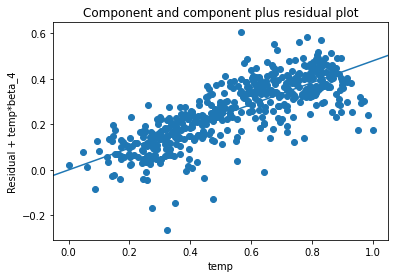

In [51]:
# Validating Linear Relationship
sm.graphics.plot_ccpr(lr_model14, 'temp')
plt.show()

The partial residual plot represents the relationship between the predictor and the dependent variable while taking into account all the other variables. The linearity is well maintained in the graph.

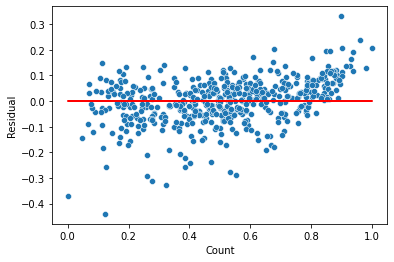

In [52]:
# Validating Homoscedasticity : The residuals have constant variance with respect to the dependent variable
y_train_pred = lr_model15.predict(X_train_sm)
sns.scatterplot(y_train,(y_train - y_train_pred))
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

Homoscedasticity is well respected since the variance of the residuals are almost constant in the graph.

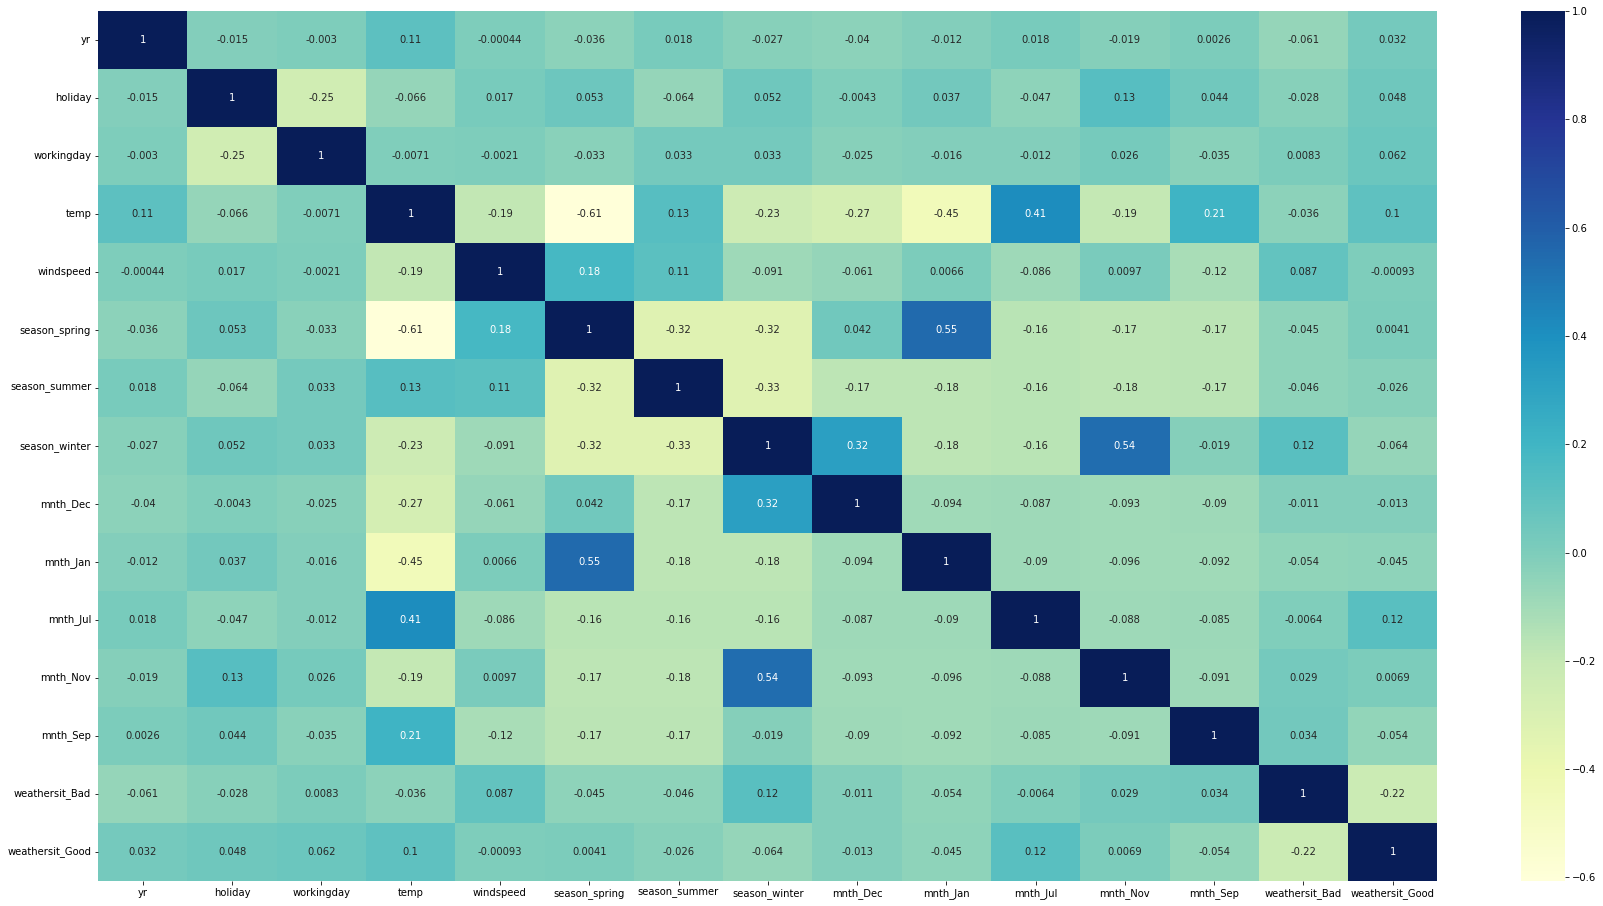

In [53]:
# Validating Multi Colinearity
plt.figure(figsize=(30,16))
sns.heatmap(X.corr(),annot=True, cmap='YlGnBu')
plt.show()

All variables have less than 0.56 correlation with eachother. 

In [54]:
print(vif)

           Features   VIF
3              temp  6.60
4         windspeed  4.70
2        workingday  3.61
5     season_spring  3.12
7     season_winter  3.03
14  weathersit_Good  2.89
6     season_summer  2.29
0                yr  2.07
11         mnth_Nov  1.83
9          mnth_Jan  1.65
10         mnth_Jul  1.60
8          mnth_Dec  1.47
12         mnth_Sep  1.34
1           holiday  1.14
13   weathersit_Bad  1.12


Considering 10 as maximum VIF permissible, the above columns are retained.

In [55]:
# Independence of residuals (absence of auto-correlation)
# Autocorrelation refers to the fact that observations’ errors are correlated
# To verify that the observations are not auto-correlated, we can use the Durbin-Watson test. 
# The test will output values between 0 and 4. The closer it is to 2, the less auto-correlation there is between the various variables
# (0–2: positive auto-correlation, 2–4: negative auto-correlation)

print('The Durbin-Watson value for Model No.15 is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4))

The Durbin-Watson value for Model No.15 is 2.019


There is almost nil auto-correlation

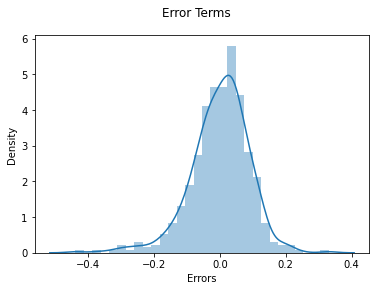

In [56]:
# Normality of Errors
y_train_pred = lr_model15.predict(X_train_sm)

# Ploting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred))
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')     
plt.show()

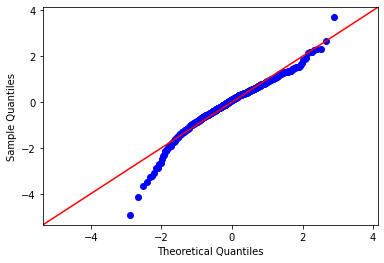

In [57]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

The error terms are normally distributed

# **Making prediction using the final model**

In [58]:
# Scaling the Test Dataset with the Scaler of the Training Set
cols = df_test.columns
df_test[cols] = scaler.transform(df_test[cols])

In [59]:
# Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [60]:
# Adding the constant column
X_test_m15 = sm.add_constant(X_test)
# Removing all the columns which has been removed from Model 15
X_test_m15 = X_test_m15.drop(['hum','mnth_Feb','mnth_Mar','mnth_May',
                              'weekday_6','mnth_Aug','mnth_Oct','atemp',
                              'weekday_1','weekday_2','weekday_3','weekday_4','weekday_5','mnth_Jun' ], axis=1)

In [61]:

# Making prediction using Model 15
y_test_pred = lr_model15.predict(np.squeeze(np.asarray(X_test_m15)))

# **Model Evaluation**

In [62]:
print('The R-Squared score of the model for the predicted values is',round(r2_score(y_test, y_test_pred),2))
print('The Root Mean Squared Error of the model for the predicted values is',round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4))
print('The Mean Absolute Error of the model for the predicted values is',mean_absolute_error(y_test, y_test_pred))

The R-Squared score of the model for the predicted values is 0.82
The Root Mean Squared Error of the model for the predicted values is 0.0937
The Mean Absolute Error of the model for the predicted values is 0.06987879402376536


In [63]:
# R2 Score
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8162913619942512

**The equation of our best fitted line developed by Model 15 is:**

cnt=0.1808+(0.2343 X yr -0.1087 X holiday -0.0223 X workingday +0.4373 X temp -0.1589 X windspeed -0.0715 X season_spring +0.0356 X season_summer +0.0880 X season_winter -0.0444 X mnth_Dec -0.0500 X mnth_Jan -0.0506 X mnth_Jul -0.0387 X mnth_Nov +0.0683 X mnth_Sep -0.2109 X weathersit_Bad +0.0819 X weathersit_Good)

**It is evident that the bookings increase on good weather days with hotter temperature, the company must consider increasing their bike availabilty and promotions during the summer season to further increase their booking count.**

**As the R-Squared score is approximately 0.82, it has 82% of the variance captured by this model.**